**Exploratory Data Analysis - Terrorism**

Author : Vallabh Kulkarni

**Problem Statement:**

Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

As a security/defense analyst, try to find out the hot zone of terrorism.

What all security issues and insights you can derive by EDA?

## Import  Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [10]:
from google.colab import files
uploaded = files.upload()

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist (2).csv


In [12]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132416 entries, 0 to 132415
Columns: 135 entries, eventid to related
dtypes: float64(60), int64(17), object(58)
memory usage: 136.4+ MB


In [14]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.324160e+05,132416.000000,132416.000000,132416.000000,132416.000000,132416.000000,132416.000000,128140.000000,1.281390e+05,132410.000000,132416.000000,132416.000000,132416.000000,132416.000000,132415.000000,19529.000000,132415.000000,132416.000000,132416.000000,132416.000000,3769.000000,223.000000,132416.000000,126021.000000,131524.000000,6814.000000,6386.000000,6509.000000,758.000000,688.000000,730.000000,132036.000000,761.000000,98.000000,132416.000000,61301.000000,62927.000000,66296.000000,9017.000000,696.000000,291.000000,96.000000,58.000000,4514.000000,132416.000000,117047.000000,8214.000000,7350.000000,1092.000000,989.000000,73.000000,70.000000,124957.000000,67977.000000,66585.000000,120900.000000,67725.000000,65301.000000,132415.000000,47757.000000,2.268100e+04,132237.000000,8971.000000,8916.000000,2645.000000,4941.000000,72780.000000,1.078000e+03,2.920000e+02,5.030000e+02,281.000000,6390.000000,5798.000000,132415.000000,132415.000000,132415.000000,132415.00000
mean,1.997911e+11,1997.846129,6.346053,15.387023,0.036121,134.621284,6.713894,22.474186,-6.533172e+02,1.435896,0.066427,0.987668,0.992501,0.892498,-0.789465,1.292488,0.122682,0.910759,0.026100,3.134123,3.409923,4.636771,8.173015,46.410154,127.469017,9.723364,52.724241,133.090029,9.372032,53.154070,134.019178,0.099087,0.328515,0.367347,0.002183,-54.616564,-2.375451,-0.065253,7.057114,0.205460,7.487973,0.583333,7.448276,-6.804608,6.375657,10.915863,6.568907,10.623673,6.750916,11.194135,6.246575,10.842857,2.256736,0.075128,0.291432,3.235451,0.061159,0.044410,-0.251240,3.322256,3.435976e+05,0.060422,3.998551,-0.508973,-27.047637,-20.682048,-0.143391,3.346505e+06,1.115335e+06,5.424765e+05,436.615658,4.466354,-23.727492,-4.640154,-4.591262,0.101046,-3.97936
std,1.249377e+09,12.495098,3.405990,8.808493,0.186592,117.548402,3.011636,20.072823,2.407663e+05,1.027966,0.292923,0.110365,0.086272,0.309752,2.820650,0.611967,0.328074,0.285093,0.159432,1.844234,2.097268,2.227569,6.650774,31.559803,86.806328,5.836104,25.995613,128.624275,5.886093,26.933247,142.358450,0.298779,0.469982,0.484561,0.046667,285.863106,15.903632,1.389800,2.958707,1.495133,3.229555,0.495595,3.424230,3.919579,2.097738,6.688845,1.944828,7.499055,2.052529,8.133547,1.507212,8.192672,10.612435,7.459093,3.248970,41.263268,4.007919,1.001096,2.833751,0.506315,2.032693e+07,0.361880,235.759459,8.212997,93.233518,138.688024,1.188066,3.257851e+07,9.805617e+06,2.879124e+06,4072.593808,2.061364,59.878373,4.544022,4.608481,0.649495,4.68710
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.00000
25%,1.9

In [15]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999995,-0.041258,0.007702,0.079266,-0.155942,0.359769,0.155393,0.003720,0.022773,0.090779,-0.007958,0.026983,0.050750,0.245382,0.074740,0.078005,-0.024122,0.141340,0.024004,-0.082147,-0.063979,0.057849,0.043943,-0.031580,0.051832,0.066773,-0.113168,0.098268,0.029152,-0.035222,0.137967,0.020344,0.091522,0.005496,-0.129599,0.512025,0.089214,0.175381,0.015120,0.191868,-0.411738,0.095824,0.191605,-0.067006,0.100529,0.022155,0.041504,0.043051,0.086057,-0.138596,0.027110,0.005552,-0.012665,-0.011491,0.021615,-0.029957,-0.000054,-0.301890,-0.133474,-0.009335,-0.013074,0.005907,-0.039390,-0.406885,-0.135143,-0.314360,-0.002393,0.051265,-0.146733,-0.168613,0.321719,-0.232656,-0.240040,-0.235120,-0.075316,-0.266956
iyear,0.999995,1.000000,-0.043986,0.007626,0.079262,-0.155895,0.359796,0.155457,0.003733,0.022773,0.090794,-0.007981,0.026987,0.050718,0.245428,0.074733,0.078018,-0.024124,0.141322,0.024011,-0.081976,-0.063703,0.057852,0.043943,-0.031527,0.051755,0.066703,-0.113075,0.098014,0.028907,-0.035315,0.137949,0.020409,0.092050,0.005510,-0.129659,0.511766,0.089112,0.175312,0.015764,0.191674,-0.411853,0.096171,0.190973,-0.067000,0.100514,0.022110,0.041422,0.043024,0.086411,-0.138298,0.026855,0.005542,-0.012689,-0.011463,0.021602,-0.029963,-0.000027,-0.301876,-0.133491,-0.009326,-0.013095,0.005879,-0.039402,-0.406892,-0.135293,-0.314066,-0.002377,0.050823,-0.146782,-0.168419,0.321704,-0.232595,-0.240002,-0.235083,-0.075304,-0.266909
imonth,-0.041258,-0.043986,1.000000,0.004721,-0.004803,-0.010915,-0.024073,-0.026813,-0.004643,-0.003304,-0.009552,-0.001645,-0.002837,0.012434,-0.027582,0.001427,-0.007076,0.002250,0.001085,-0.004377,-0.014555,-0.040921,-0.003729,-0.001721,-0.016679,0.018477,0.014604,-0.010848,0.062292,0.059642,0.026296,0.000344,-0.021665,-0.144619,-0.005322,0.024830,0.021166,0.018547,0.015966,-0.128265,-0.017763,0.102683,-0.116115,0.124781,0.000393,0.000243,0.011444,0.021985,-0.032524,-0.109433,-0.062079,0.058090,0.003157,0.005612,-0.005751,0.003712,0.002418,-0.005894,0.006599,0.008284,-0.002675,0.006379,0.010755,0.005258,0.024616,0.016111,-0.075080,-0.007355,0.075708,0.013271,-0.024741,0.013774,-0.015326,-0.005987,-0.006109,-0.001780,-0.008908
iday,0.007702,0.007626,0.004721,1.000000,-0.003925,0.006085,0.007343,-0.000195,-0.002728,-0.013336,-0.008351,0.011350,-0.001438,0.001952,-0.002611,-0.013009,-0.003950,-0.002961,0.004471,-0.014752,0.007737,-0.129139,-0.003662,-0.005256,0.006889,0.011936,0.015230,-0.039061,-0.057862,-0.053764,-0.065415,-0.002640,0.016680,0.017477,-0.007144,-0.018773,-0.000353,0.001520,-0.000639,-0.059819,0.018201,0.188099,0.163797,0.027744,-0.009410,0.005907,0.006782,-0.019419,0.001420,-0.070697,-0.005110,0.073744,-0.002163,-0.002275,0.000848,-0.000483,0.002379,0.005663,-0.005982,-0.006043,-0.000903,-0.003743,-0.020388,-0.005411,-0.015870,0.015417,0.000967,0.010004,-0.013640,0.008835,0.000051,0.002927,0.007838,-0.006744,-0.007064,-0.001313,-0.005505
extended,0.079266,0.079262,-0.004803,-0.003925,1.000000,-0.031632,0.018619,-0.021626,0.000544,0.049068,0.023251,-0.020909,0.004630,0.044580,0.002827,0.098911,-0.029212,0.057900,-0.028898,0.253881,0.074487,-0.087365,0.002455,0.006273,0.011802,-0.013798,0.009095,0.051766,0.080374,0.083631,0.016634,0.053303,-0.104795,

In [16]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

US Terror Attacks and Death Injuries.

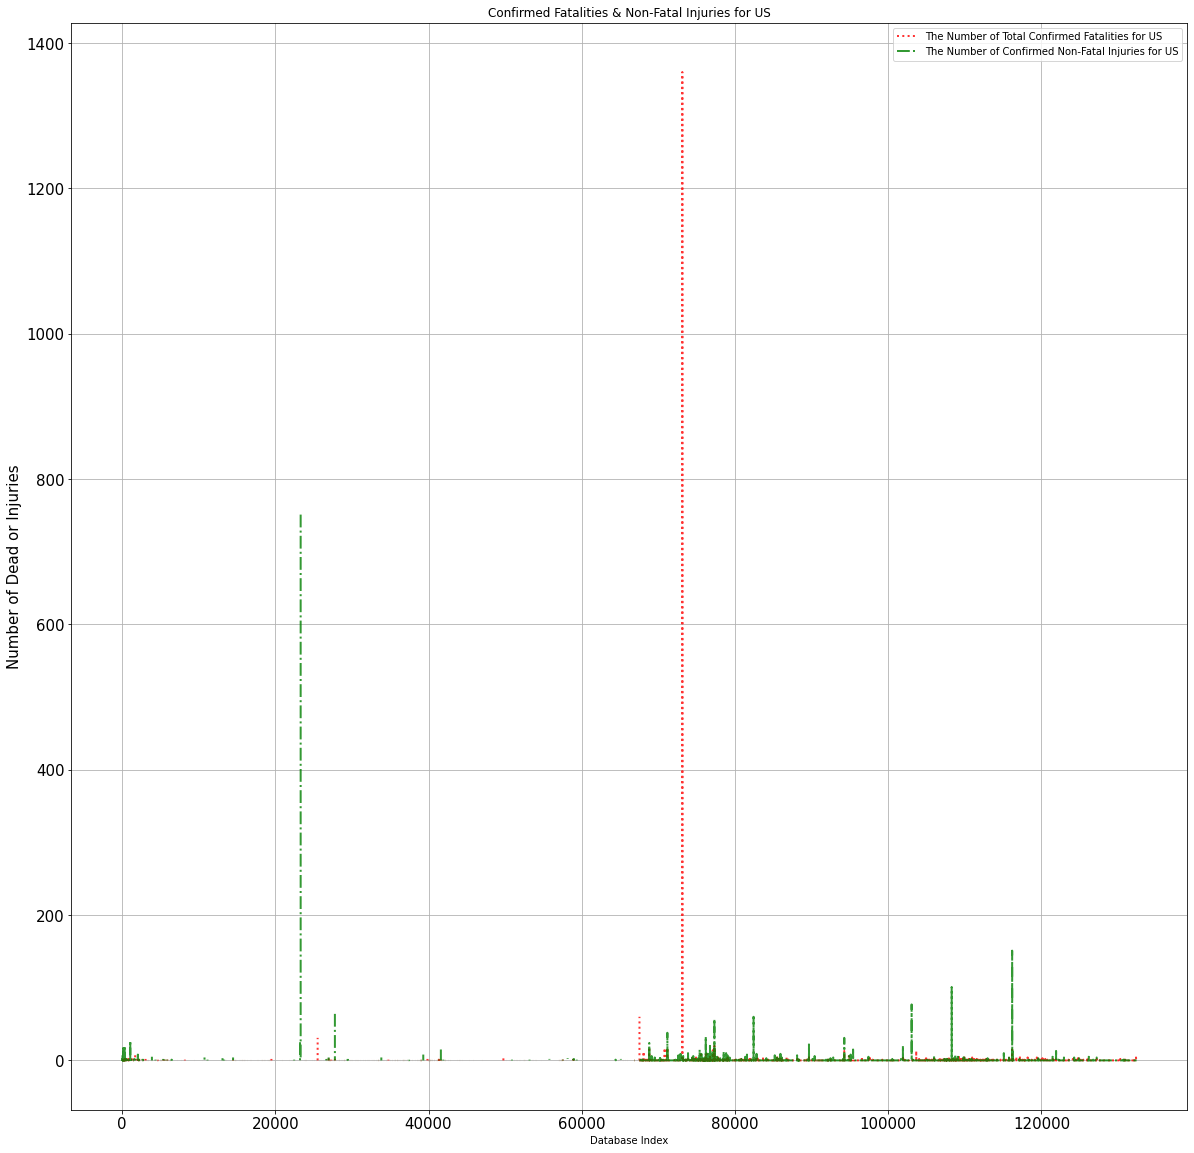

In [17]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

Given that the data is sorted by dates, attacks on US citizens seem to be very rare in a given date range. But the terrorist act against the citizens of US has been increasingly in the following year after this rare date range. By finding the date of the start of the increase, the factors in increasing terrorist acts can be easily identified by taking into account the changes and developments in the country after this date

Death and Injuries at all time.

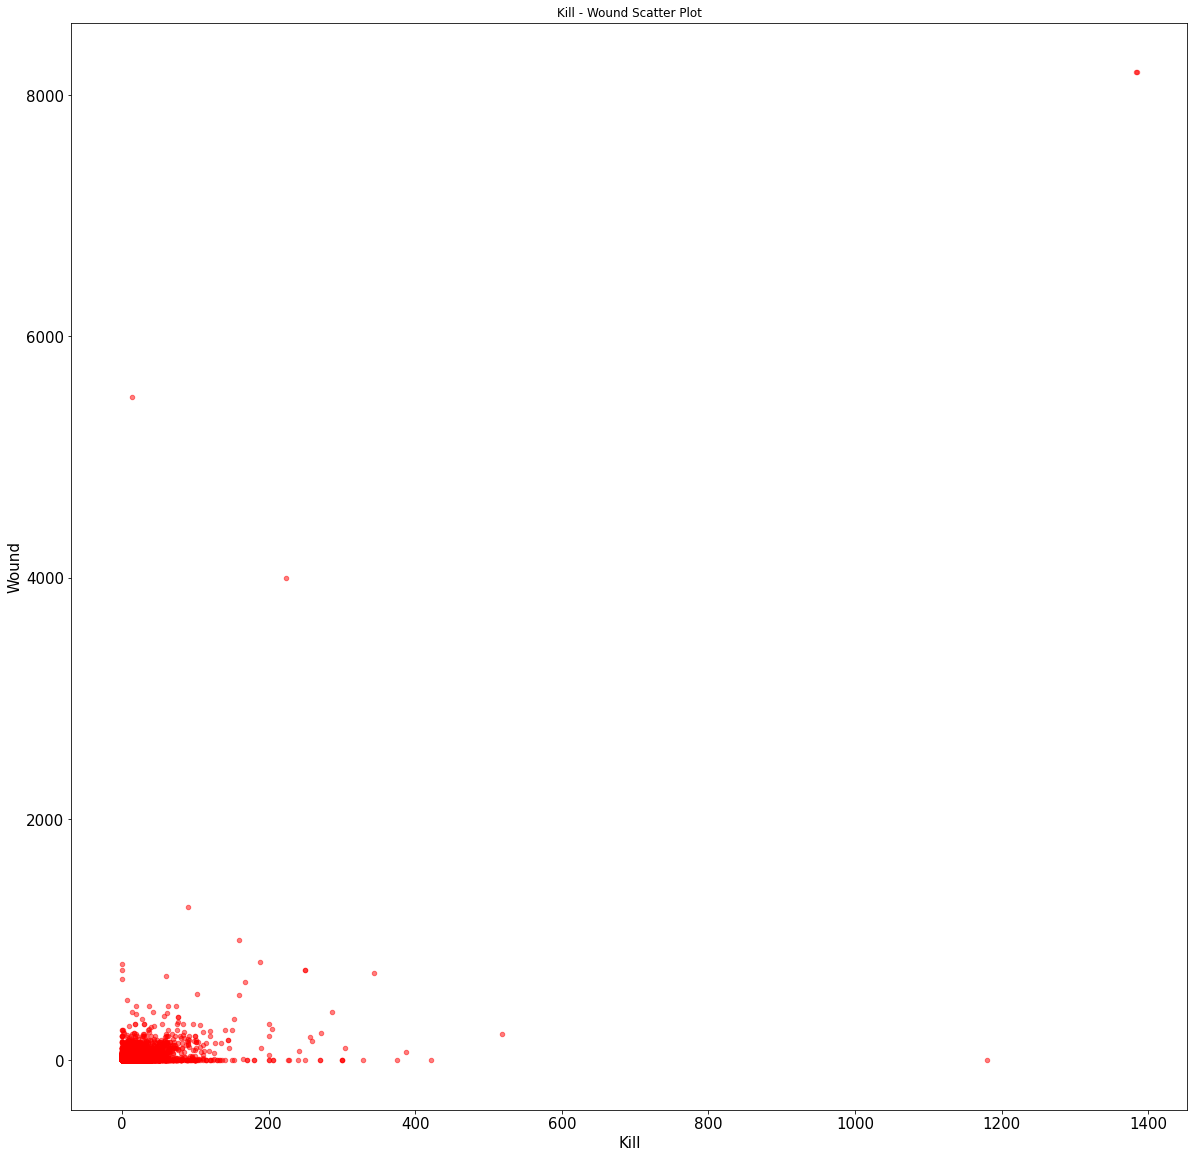

In [18]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

In the majority of acts of terrorism, the mortality rate and injuries were low, but a small number of actions led to too many deaths and injuries.

Frequency of Terrorist Actions in Customized Region

Let's analyze in Middle East and North Africa

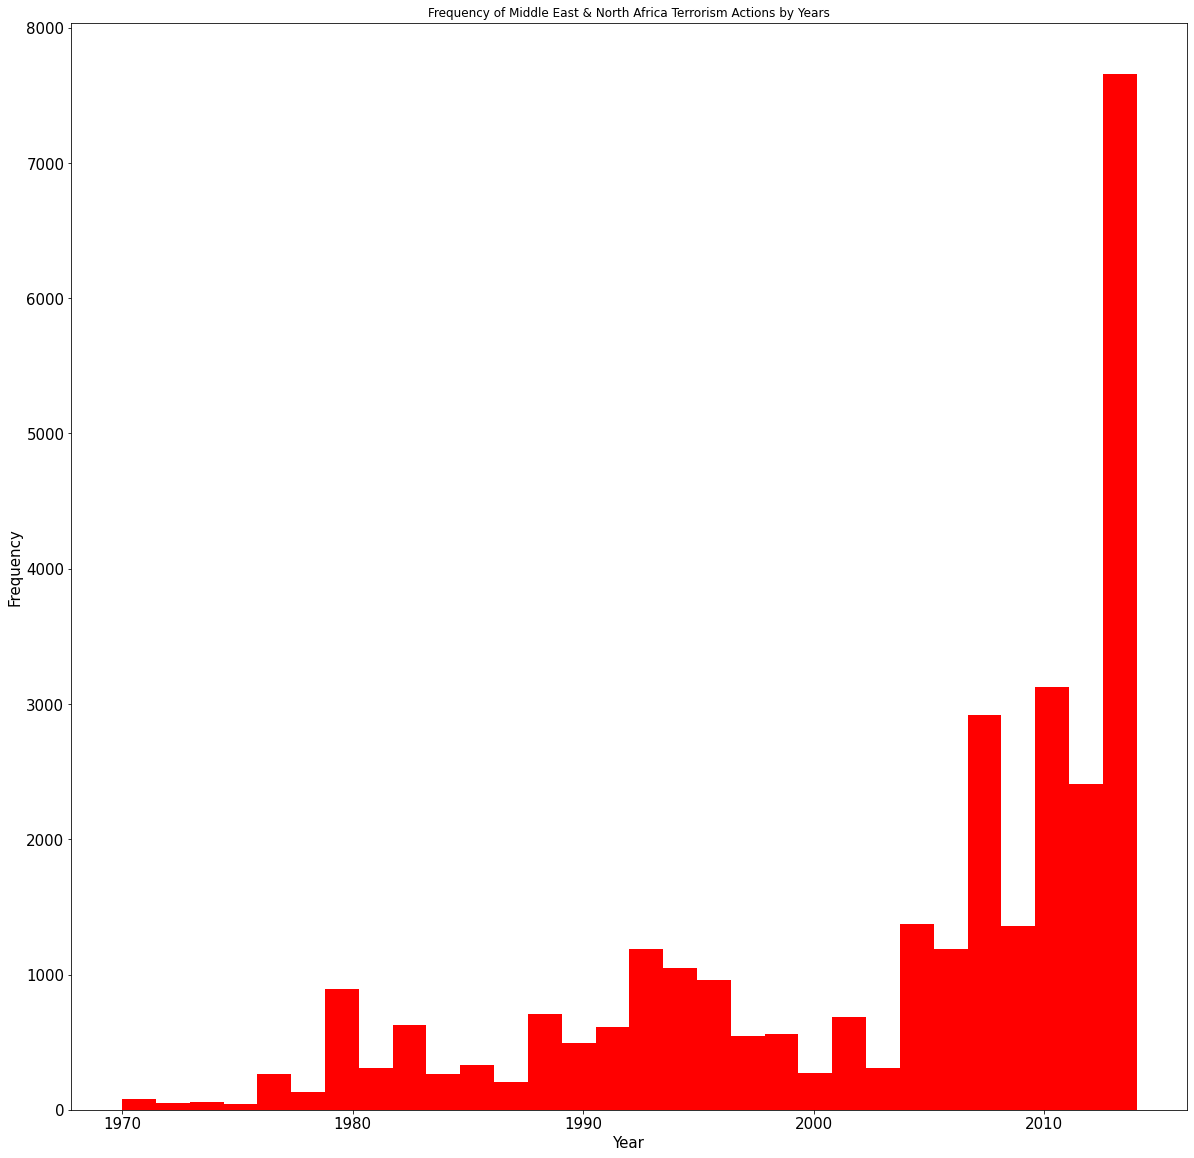

In [19]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

Terrorist attacks have increased in recent years

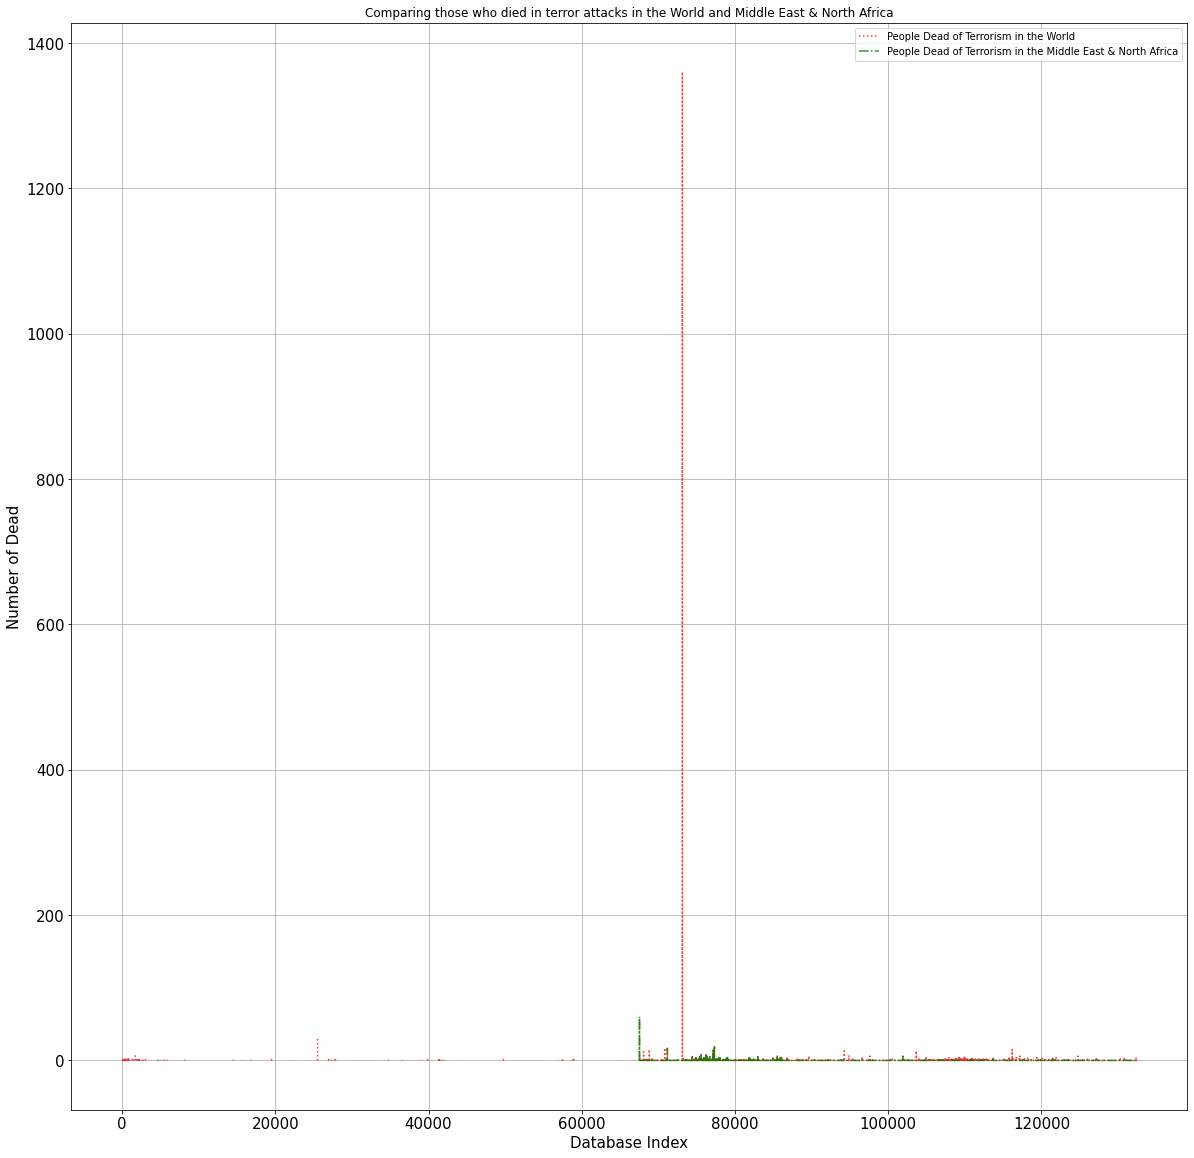

In [20]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

Terrorist Attacks of a Particular year and their Locations.

Let's look at the terrorist acts in the world over a certain year.

In [21]:
filterYear = df['iyear'] == 1970

In [22]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [23]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map


84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

Total Number of people killed in terror attack

In [24]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 281995



Number of people killed by terror attack: 411868
Let's look at what types of attacks these deaths were made of

In [25]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [26]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,123977.0,21388.0,102812.0,2947.0,3603.0,2321.0,7475.0,727.0,16745.0


In [27]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes



Number of Killed in Terrorist Attacks by Countries.

In [28]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [29]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,17214.0,41.0,11008.0,0.0,3036.0,0.0,490.0,31.0,13.0,28.0,252.0,1.0,29.0,1039.0,76.0,14.0,41.0,3.0,0.0,9.0,42.0,75.0,11.0,199.0,0.0,28.0,3.0,3884.0,543.0,143.0,351.0,745.0,723.0,225.0,645.0,14381.0,1.0,17.0,248.0,8.0,...,96.0,1267.0,15523.0,0.0,2.0,3072.0,29.0,6.0,13.0,74.0,4232.0,60.0,292.0,48.0,2350.0,76.0,6.0,136.0,5140.0,3.0,2881.0,150.0,122.0,3358.0,3539.0,5.0,68.0,0.0,0.0,212.0,1.0,0.0,1182.0,97.0,1.0,3242.0,119.0,324.0,70.0,154.0


In [30]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 205 entries, Afghanistan to Zimbabwe
dtypes: float64(205)
memory usage: 1.6+ KB


In [31]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

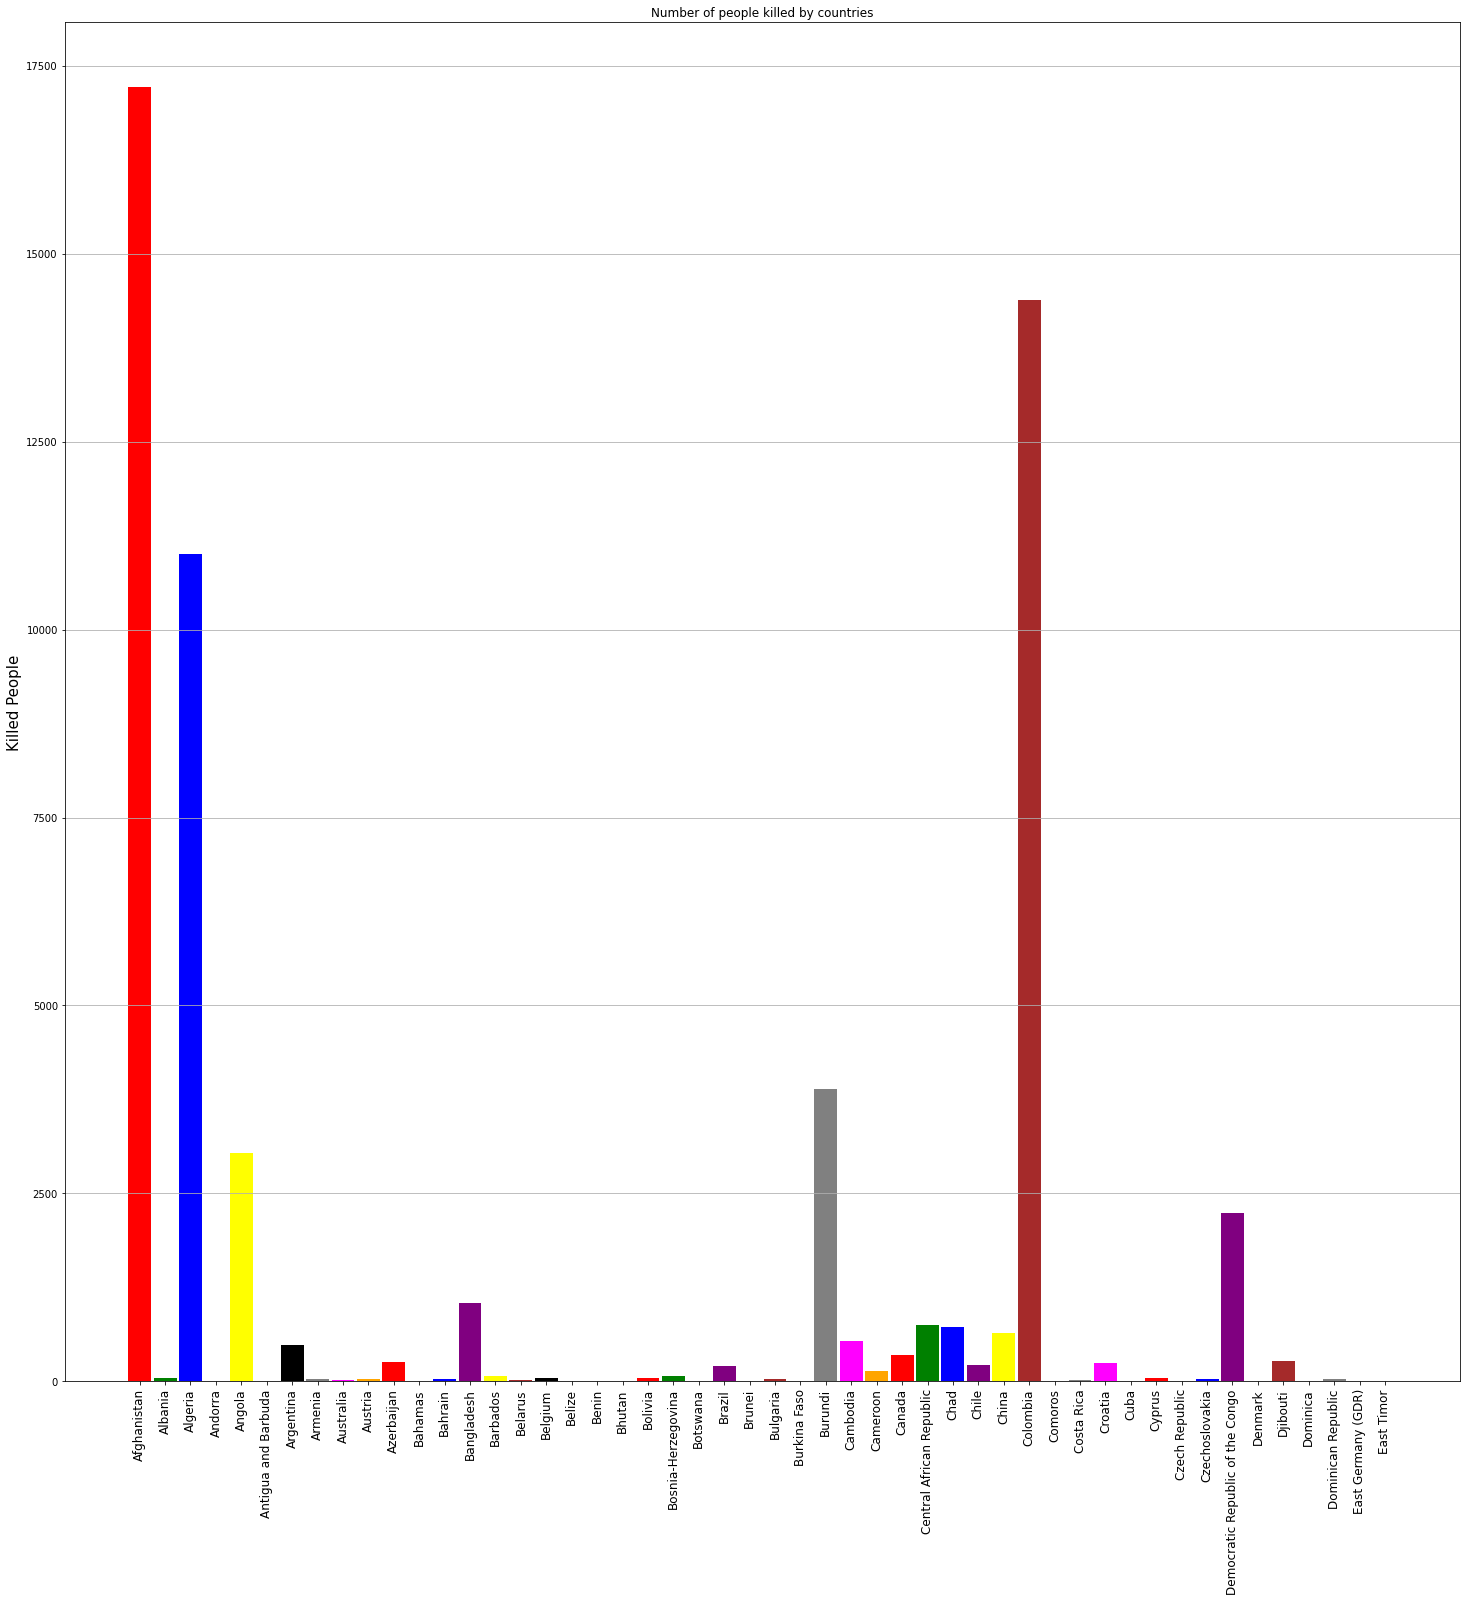

In [32]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

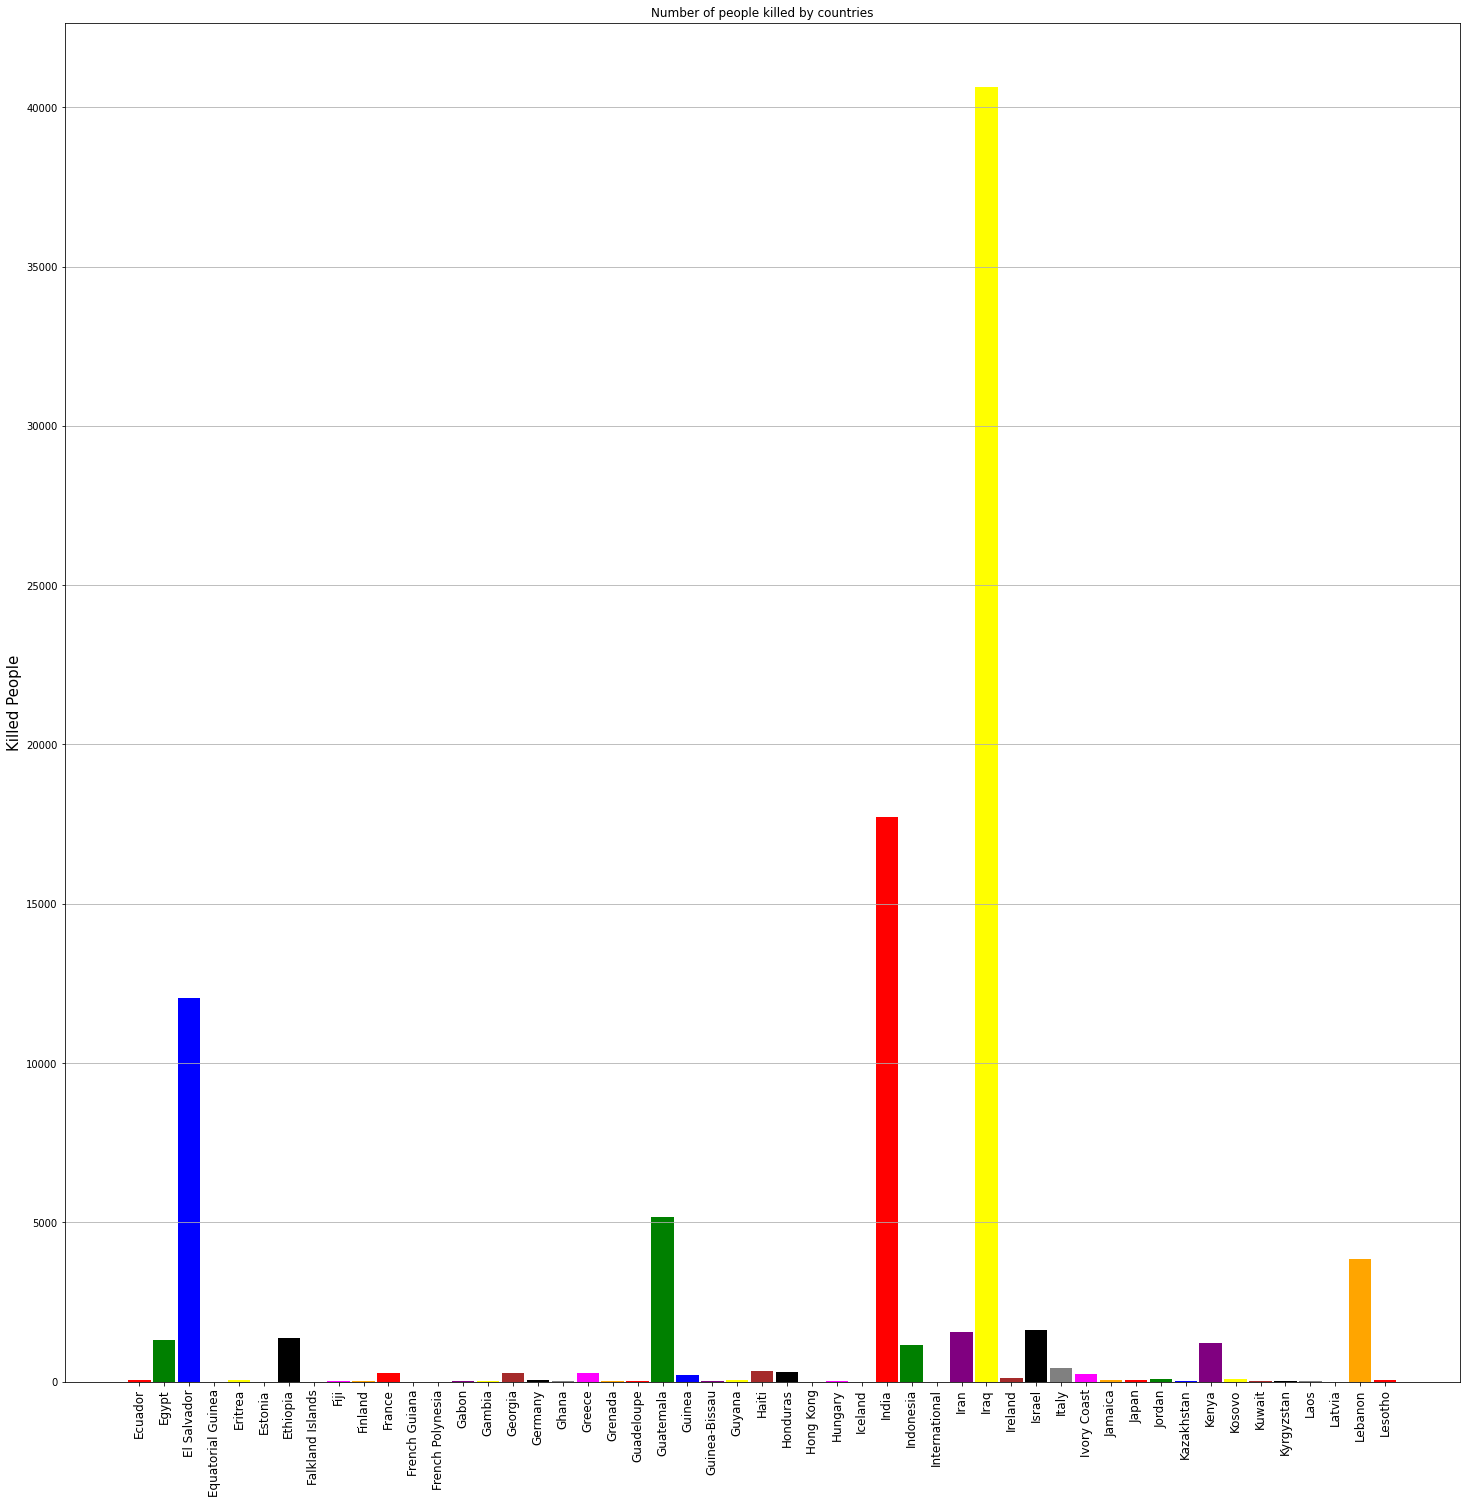

In [33]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

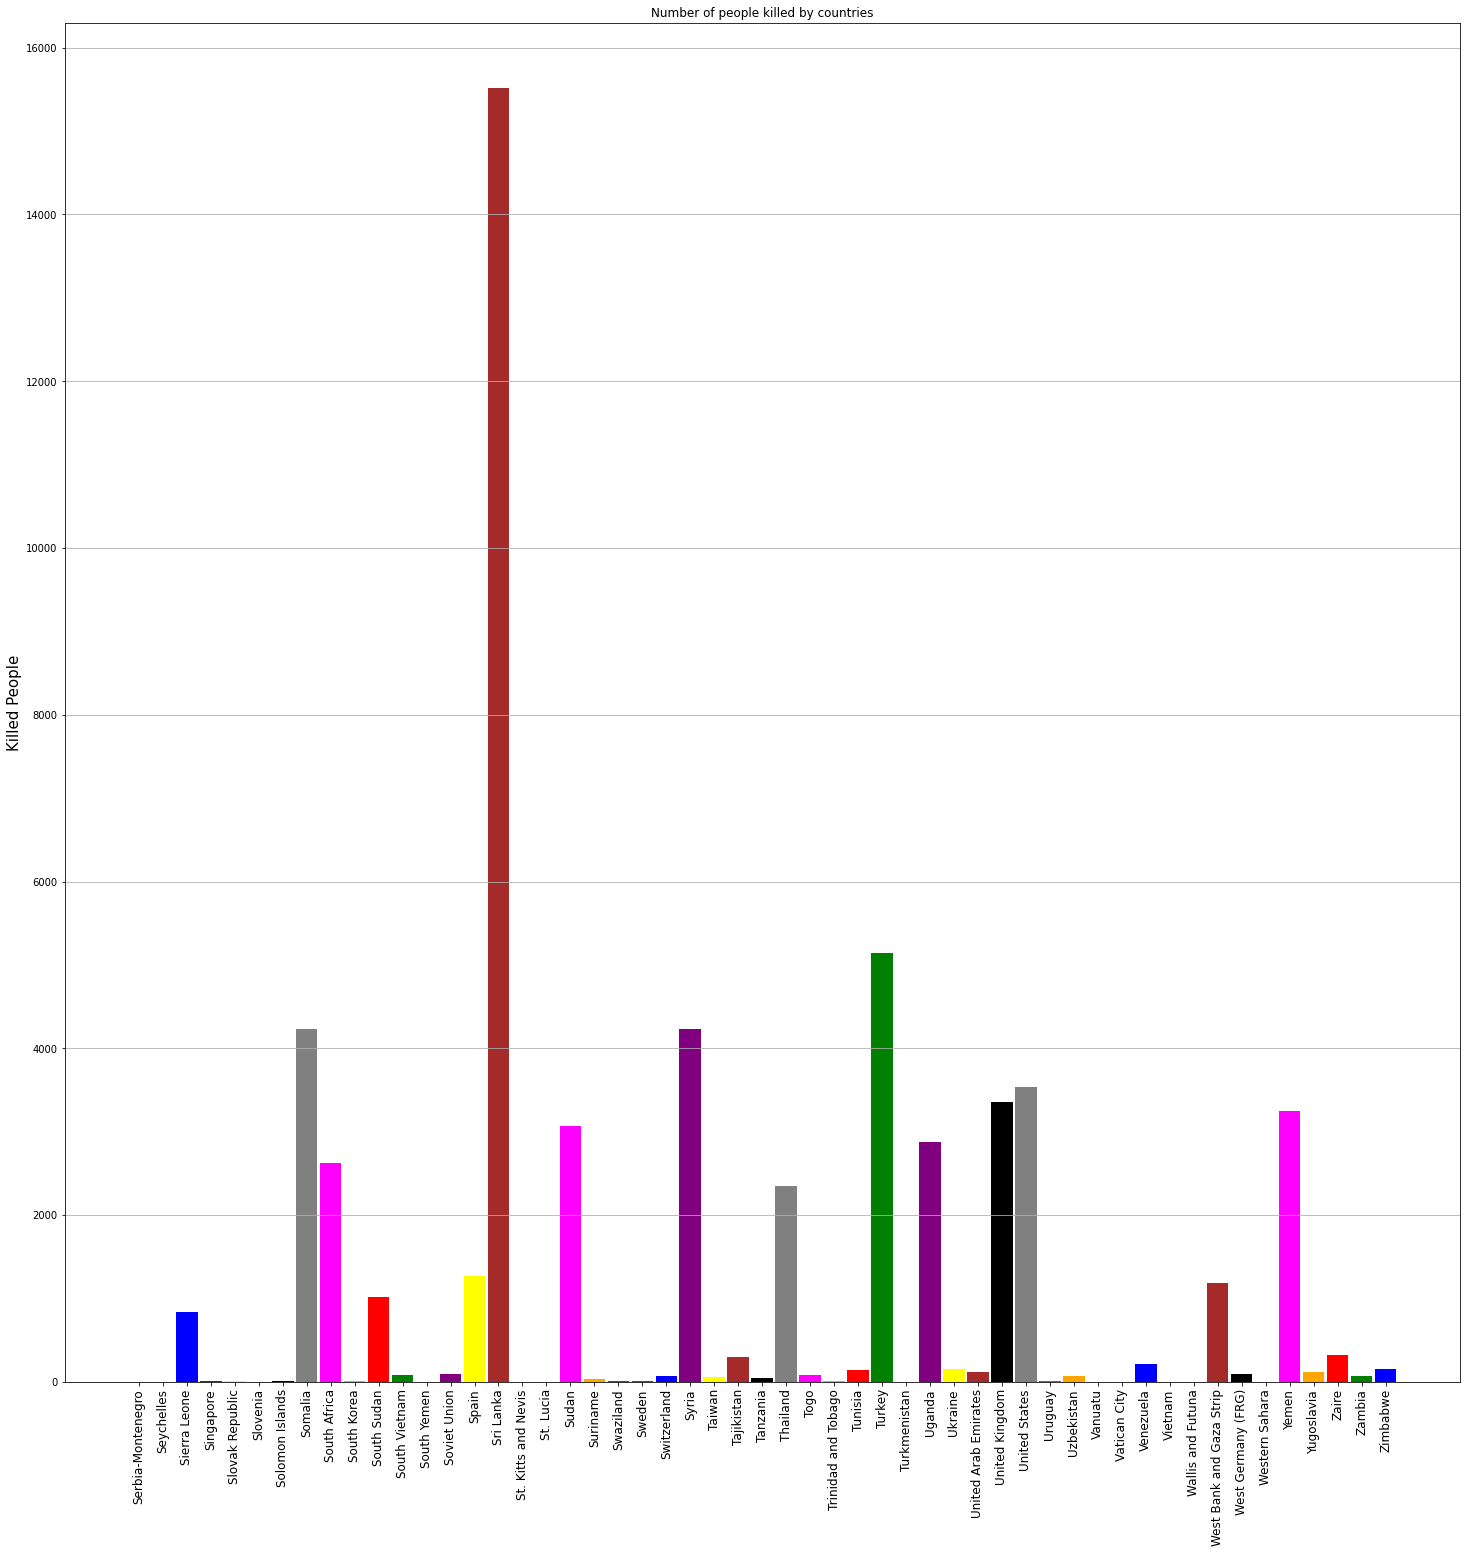

In [34]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()